# 한강공원(뚝섬) 주차 혼잡도(여유,보통,혼잡,매우혼잡) 예측

---
## 사용 데이터
    서울시 한강공원 일별 데이터 사용(2020~2024)

In [100]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
df_1 = pd.read_csv("../Data/한강공원 주차장 일별 이용 현황.csv",encoding='euc-kr')

---
## 데이터 전처리

### 뚝섬 데이터 추출

    주차장 별 주차구획수(계):
    뚝섬1주차장: 67,
    뚝섬2주차장: 356,
    뚝섬3주차장: 112,
    뚝섬4주차장: 136,

In [101]:
# PLT-005(뚝섬 한강공원)
df_1 = df_1[df_1['지구별'] == 'PLT-005'].sort_index(ignore_index=True)

### 데이터 구조 확인
    컬럼의 이름, 데이터 유형, 결측치 여부를 확인하여 데이터의 기본 구조를 파악

In [102]:
df_1.columns

Index(['지구별', '주차장명', '주차대수', '이용시간', '날짜'], dtype='object')

In [103]:
df_1.주차장명.unique()

array(['뚝섬1주차장', '뚝섬3주차장', '뚝섬4주차장', '뚝섬2주차장'], dtype=object)

In [104]:
# 데이터 head
df_1.head()

,지구별,주차장명,주차대수,이용시간,날짜
0,PLT-005,뚝섬1주차장,273,22891,2024/11/10
1,PLT-005,뚝섬3주차장,686,62848,2024/11/10
2,PLT-005,뚝섬4주차장,864,79419,2024/11/10
3,PLT-005,뚝섬2주차장,965,108345,2024/11/10
4,PLT-005,뚝섬2주차장,850,91910,2024/11/09


In [105]:
# 데이터 tail
df_1.tail()

,지구별,주차장명,주차대수,이용시간,날짜
6951,PLT-005,뚝섬2주차장,127,30987,2020/01/21
6952,PLT-005,뚝섬3주차장,58,1468,2020/01/20
6953,PLT-005,뚝섬3주차장,242,14229,2020/01/19
6954,PLT-005,뚝섬3주차장,253,18191,2020/01/18
6955,PLT-005,뚝섬3주차장,159,19681,2020/01/17


In [106]:
# 데이터 정보 확인
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6956 entries, 0 to 6955
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   지구별     6956 non-null   object
 1   주차장명    6956 non-null   object
 2   주차대수    6956 non-null   int64 
 3   이용시간    6956 non-null   int64 
 4   날짜      6956 non-null   object
dtypes: int64(2), object(3)
memory usage: 271.8+ KB


> NaN값이 없는 것을 확인 할 수 있다.

In [107]:
# 기초 통계 확인
df_1.describe()

,주차대수,이용시간
count,6956.000000,6956.000000
mean,526.861415,52692.554198
std,350.742185,41924.445747
min,1.000000,0.000000
25%,250.000000,19991.000000
50%,460.000000,44253.000000
75%,702.000000,71251.750000
max,2999.000000,291616.000000


> 주차장 주차구획수가 없으므로 컬럼 추가

In [108]:
# 주차장별 총 주차 가능 대수
total_parking_capacity = {
    '뚝섬1주차장': 67,
    '뚝섬2주차장': 356,
    '뚝섬3주차장': 112,
    '뚝섬4주차장': 136,
}


# '주차장명'을 기준으로 '주차구획수' 컬럼 추가
df_1['주차구획수'] = df_1['주차장명'].map(total_parking_capacity)

# 확인
df_1[['주차장명', '주차구획수']].head()

,주차장명,주차구획수
0,뚝섬1주차장,67
1,뚝섬3주차장,112
2,뚝섬4주차장,136
3,뚝섬2주차장,356
4,뚝섬2주차장,356


### 휴일여부 및 요일 추가

In [109]:
df_1

,지구별,주차장명,주차대수,이용시간,날짜,주차구획수
0,PLT-005,뚝섬1주차장,273,22891,2024/11/10,67
1,PLT-005,뚝섬3주차장,686,62848,2024/11/10,112
2,PLT-005,뚝섬4주차장,864,79419,2024/11/10,136
3,PLT-005,뚝섬2주차장,965,108345,2024/11/10,356
4,PLT-005,뚝섬2주차장,850,91910,2024/11/09,356
...,...,...,...,...,...,...
6951,PLT-005,뚝섬2주차장,127,30987,2020/01/21,356
6952,PLT-005,뚝섬3주차장,58,1468,2020/01/20,112
6953,PLT-005,뚝섬3주차장,242,14229,2020/01/19,112
6954,PLT-005,뚝섬3주차장,253,18191,2020/01/18,112


In [110]:
# 날짜 컬럼을 날짜 형식으로 전환
df_1['날짜'] = pd.to_datetime(df_1['날짜'], format= '%Y/%m/%d')

# 월별로 차이를 알기 위해 연도,월,일별 컬럼 추가
df_1['연도'] = df_1['날짜'].dt.year
df_1['월'] = df_1['날짜'].dt.month
df_1['일'] = df_1['날짜'].dt.day

In [111]:
import holidays

# 대한민국 공휴일 불러오기
kr_holidays = holidays.KR(years=range(2020,2025))

# 요일 숫자를 요일 이름으로 변환
df_1['요일'] = df_1['날짜'].dt.weekday

# 공휴일 체크
df_1['휴일여부'] = df_1['날짜'].apply(lambda x: 2 if x in kr_holidays else (1 if x.weekday() >= 5 else 0))

# 데이터 확인
df_1

,지구별,주차장명,주차대수,이용시간,날짜,주차구획수,연도,월,일,요일,휴일여부
0,PLT-005,뚝섬1주차장,273,22891,2024-11-10,67,2024,11,10,6,1
1,PLT-005,뚝섬3주차장,686,62848,2024-11-10,112,2024,11,10,6,1
2,PLT-005,뚝섬4주차장,864,79419,2024-11-10,136,2024,11,10,6,1
3,PLT-005,뚝섬2주차장,965,108345,2024-11-10,356,2024,11,10,6,1
4,PLT-005,뚝섬2주차장,850,91910,2024-11-09,356,2024,11,9,5,1
...,...,...,...,...,...,...,...,...,...,...,...
6951,PLT-005,뚝섬2주차장,127,30987,2020-01-21,356,2020,1,21,1,0
6952,PLT-005,뚝섬3주차장,58,1468,2020-01-20,112,2020,1,20,0,0
6953,PLT-005,뚝섬3주차장,242,14229,2020-01-19,112,2020,1,19,6,1
6954,PLT-005,뚝섬3주차장,253,18191,2020-01-18,112,2020,1,18,5,1


### 평균 이용시간 추가

In [112]:
# 한글 폰트 문제 해결 
# matplotlib은 한글 폰트를 지원하지 않음
# os정보
import platform
import matplotlib.pyplot as plt

# font_manager : 폰트 관리 모듈
# rc : 폰트 변경 모듈
from matplotlib import font_manager, rc
# unicode 설정
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic') # os가 macos
elif platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf' # os가 windows
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print("Unknown System")

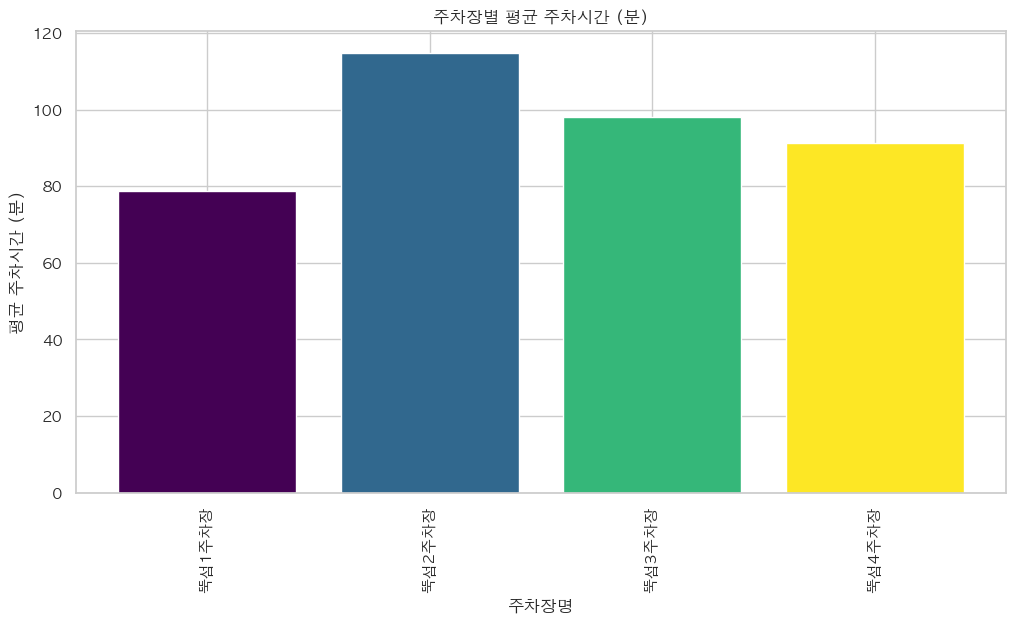

In [113]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# 주차장별 평균 주차시간을 계산
avg_parking_time = df_1.groupby('주차장명').apply(lambda x: x['이용시간'].sum() / x['주차대수'].sum())
avg_parking_time = avg_parking_time.reset_index()
avg_parking_time.columns = ['주차장명', '평균_주차시간(분)']

# 그래프 그리기
plt.figure(figsize=(12, 6))

# 컬러맵에서 색상 가져오기
colors = cm.get_cmap('viridis', len(avg_parking_time))

# 바 그래프 그리기 (각 바마다 다른 색상 적용)
bars = plt.bar(avg_parking_time['주차장명'], avg_parking_time['평균_주차시간(분)'], color=[colors(i) for i in range(len(avg_parking_time))])

plt.title('주차장별 평균 주차시간 (분)')
plt.xlabel('주차장명')
plt.ylabel('평균 주차시간 (분)')
plt.xticks(rotation=90)
plt.show()

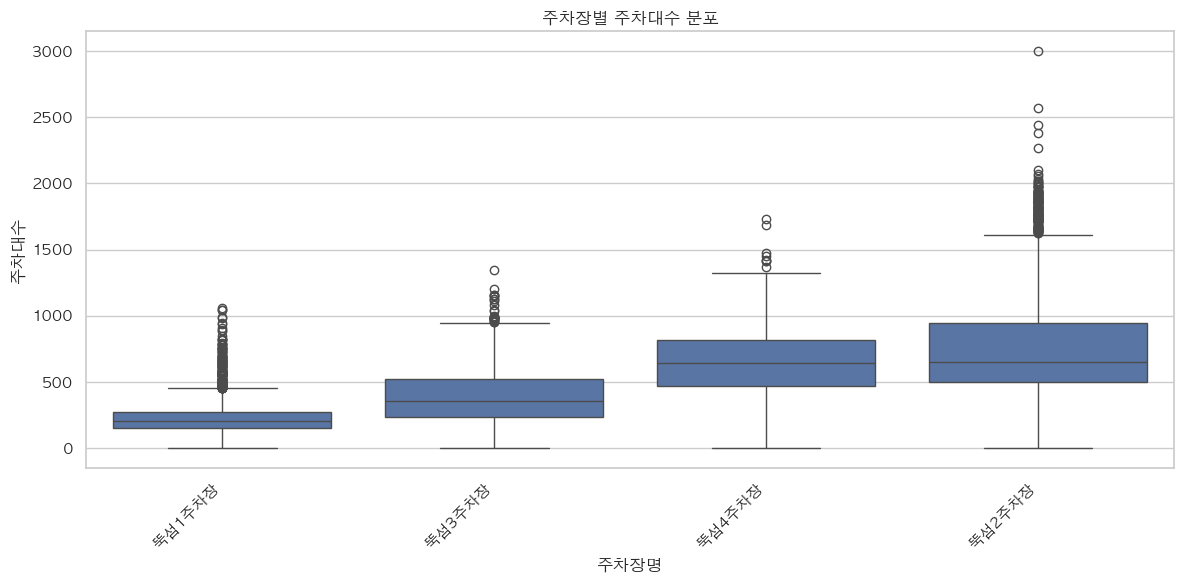

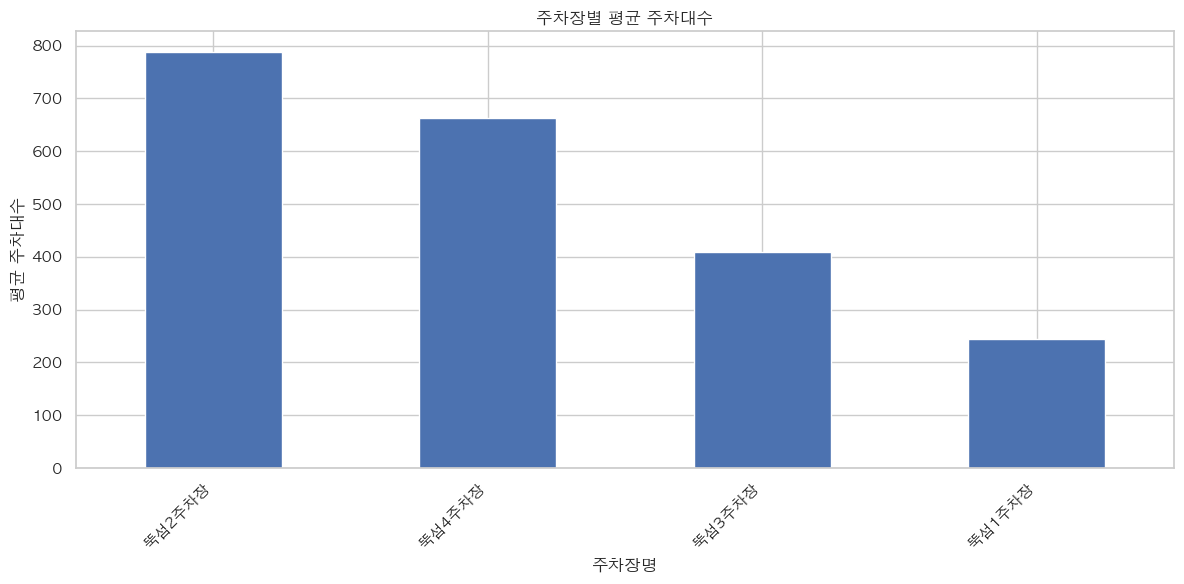

주차장명
뚝섬2주차장    787.836291
뚝섬4주차장    663.458837
뚝섬3주차장    408.983917
뚝섬1주차장    244.961872
Name: 주차대수, dtype: float64


In [114]:
import matplotlib.pyplot as plt
import seaborn as sns

# 주차장별 주차대수 분포 시각화
plt.figure(figsize=(12, 6))
sns.boxplot(x='주차장명', y='주차대수', data=df_1)
plt.title('주차장별 주차대수 분포')
plt.xlabel('주차장명')
plt.ylabel('주차대수')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 주차장별 주차대수 평균 확인 및 시각화
parking_lot_mean = df_1.groupby('주차장명')['주차대수'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
parking_lot_mean.plot(kind='bar')
plt.title('주차장별 평균 주차대수')
plt.xlabel('주차장명')
plt.ylabel('평균 주차대수')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 주차장별 평균 주차대수 출력
print(parking_lot_mean)

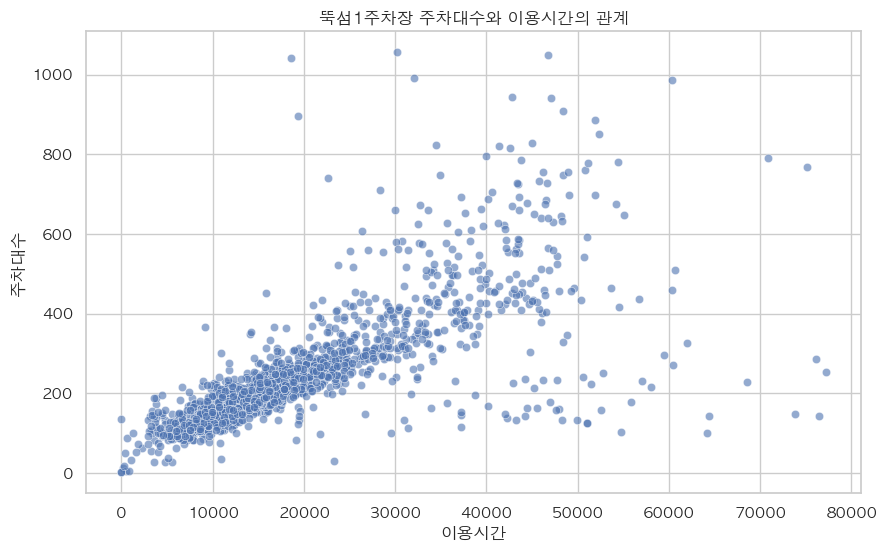

In [115]:
import matplotlib.pyplot as plt
import seaborn as sns

# 뚝섬1 주차장

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_1[df_1['주차장명'] == '뚝섬1주차장'], x='이용시간', y='주차대수', alpha=0.6)
plt.title('뚝섬1주차장 주차대수와 이용시간의 관계')
plt.xlabel('이용시간')
plt.ylabel('주차대수')
plt.show()

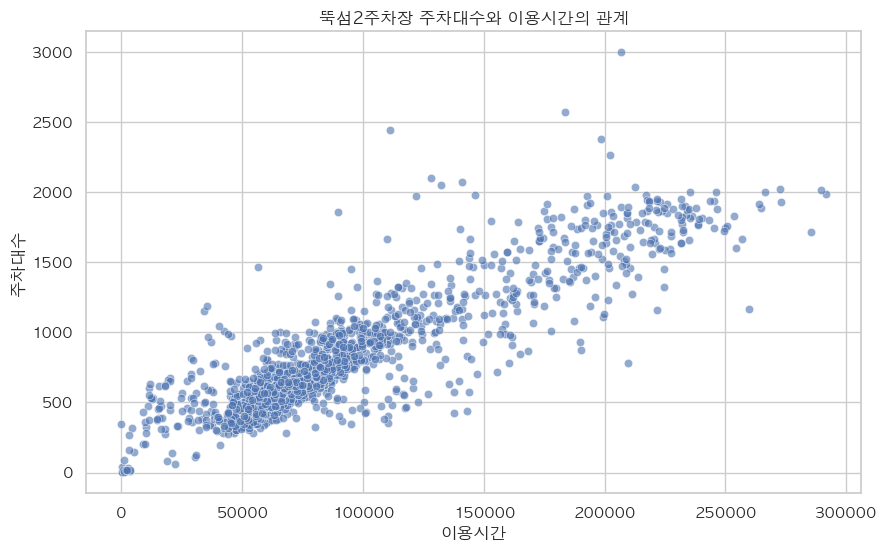

In [116]:
import matplotlib.pyplot as plt
import seaborn as sns

# 뚝섬2 주차장

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_1[df_1['주차장명'] == '뚝섬2주차장'], x='이용시간', y='주차대수', alpha=0.6)
plt.title('뚝섬2주차장 주차대수와 이용시간의 관계')
plt.xlabel('이용시간')
plt.ylabel('주차대수')
plt.show()

> 

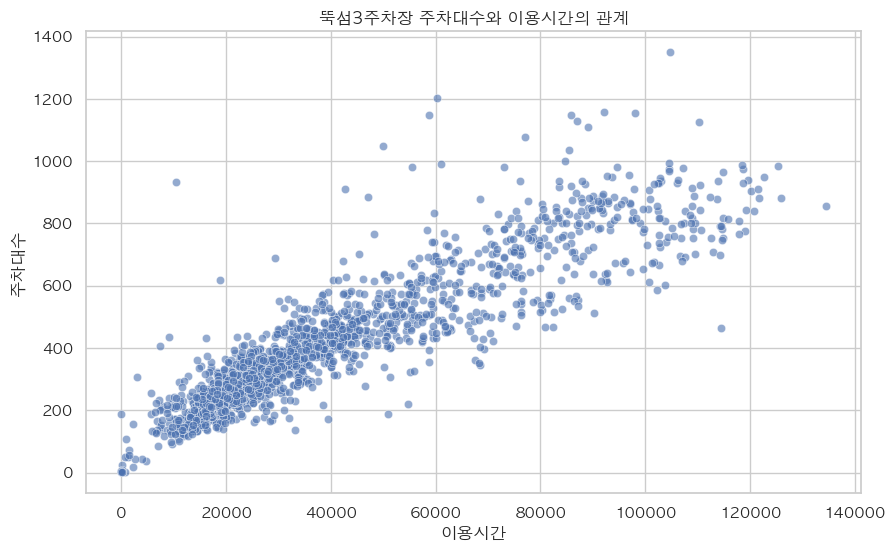

In [117]:
import matplotlib.pyplot as plt
import seaborn as sns

# 뚝섬3 주차장

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_1[df_1['주차장명'] == '뚝섬3주차장'], x='이용시간', y='주차대수', alpha=0.6)
plt.title('뚝섬3주차장 주차대수와 이용시간의 관계')
plt.xlabel('이용시간')
plt.ylabel('주차대수')
plt.show()

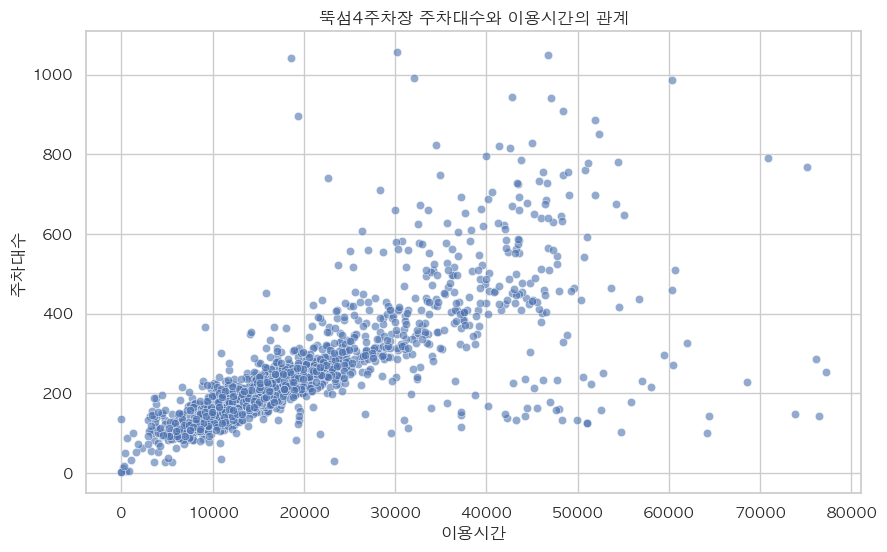

In [118]:
import matplotlib.pyplot as plt
import seaborn as sns

# 뚝섬4 주차장

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_1[df_1['주차장명'] == '뚝섬1주차장'], x='이용시간', y='주차대수', alpha=0.6)
plt.title('뚝섬4주차장 주차대수와 이용시간의 관계')
plt.xlabel('이용시간')
plt.ylabel('주차대수')
plt.show()

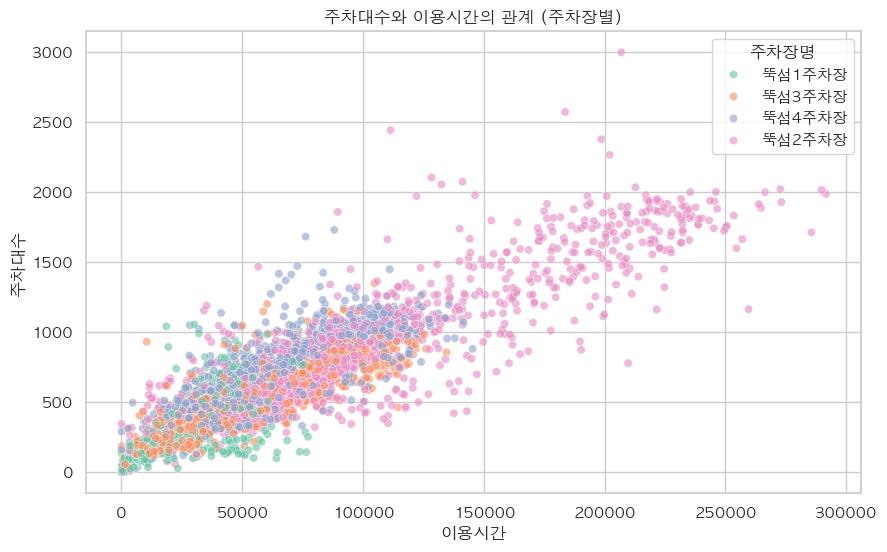

In [119]:
# 뚝섬주차장 전체보기

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))

# hue 옵션에 '주차장명'을 넣어 주차장별로 색상을 다르게 설정
sns.scatterplot(data=df_1, x='이용시간', y='주차대수', hue='주차장명', palette='Set2', alpha=0.6)

plt.title('주차대수와 이용시간의 관계 (주차장별)')
plt.xlabel('이용시간')
plt.ylabel('주차대수')
plt.legend(title='주차장명')
plt.grid(True)
plt.show()

### 교통량 정보 불러오기

> 데이터가 일별 누적 주차대수밖에 없으므로 교통량을 불러와 일별 누적 추자대수를 교통량을 기준으로 시간대별로 나눠줘야함.        
2020년 01월 ~ 2024 09월 까지 데이터 수집

In [120]:
traffic = pd.read_csv('../Data/뚝섬교통데이터.csv').sort_values(by='일자', ascending=True).reset_index(drop=True)
traffic

,지점명,일자,방향,0시,1시,2시,3시,4시,5시,6시,...,17시,18시,19시,20시,21시,22시,23시,년도,월,휴일여부
0,청담대교,2020-01-01,유입,1550.0,1554.0,821.0,587.0,469.0,538.0,739.0,...,3132.0,2575.0,2494.0,2592.0,2236.0,1820.0,1128.0,2020,1,휴일
1,영동대교,2020-01-01,유입,2139.0,1749.0,927.0,823.0,622.0,675.0,742.0,...,2090.0,1957.0,1839.0,1796.0,1728.0,1644.0,1071.0,2020,1,휴일
2,영동대교,2020-01-02,유입,817.0,623.0,426.0,330.0,386.0,593.0,1160.0,...,4110.0,4333.0,4138.0,3379.0,3036.0,3064.0,1876.0,2020,1,평일
3,청담대교,2020-01-02,유입,672.0,467.0,418.0,319.0,481.0,1121.0,2881.0,...,3688.0,3808.0,3424.0,2929.0,2735.0,2467.0,1659.0,2020,1,평일
4,청담대교,2020-01-03,유입,1136.0,845.0,660.0,605.0,632.0,1126.0,2633.0,...,3860.0,3512.0,2623.0,3691.0,3031.0,2840.0,2154.0,2020,1,평일
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3465,영동대교,2024-09-28,유입,1613.0,1152.0,864.0,824.0,691.0,910.0,1230.0,...,2906.0,2778.0,2328.0,2467.0,2446.0,2262.0,1625.0,2024,9,주말
3466,청담대교,2024-09-29,유입,1037.0,731.0,517.0,449.0,489.0,798.0,1252.0,...,3299.0,3085.0,3112.0,3164.0,3019.0,2152.0,1352.0,2024,9,주말
3467,영동대교,2024-09-29,유입,1154.0,843.0,685.0,593.0,523.0,615.0,800.0,...,2923.0,2448.0,2327.0,2245.0,1976.0,1823.0,1224.0,2024,9,주말
3468,영동대교,2024-09-30,유입,869.0,678.0,525.0,421.0,420.0,732.0,1248.0,...,3760.0,3606.0,3266.0,2963.0,3125.0,2852.0,1898.0,2024,9,평일


In [121]:
traffic['휴일여부'] = traffic['휴일여부'].replace({'주말': 1, '공휴일': 2, '평일': 0})

In [122]:
traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3470 entries, 0 to 3469
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   지점명     3470 non-null   object 
 1   일자      3470 non-null   object 
 2   방향      3470 non-null   object 
 3   0시      3470 non-null   float64
 4   1시      3470 non-null   float64
 5   2시      3470 non-null   float64
 6   3시      3470 non-null   float64
 7   4시      3470 non-null   float64
 8   5시      3470 non-null   float64
 9   6시      3470 non-null   float64
 10  7시      3470 non-null   float64
 11  8시      3470 non-null   float64
 12  9시      3470 non-null   float64
 13  10시     3470 non-null   float64
 14  11시     3470 non-null   float64
 15  12시     3470 non-null   float64
 16  13시     3470 non-null   float64
 17  14시     3470 non-null   float64
 18  15시     3470 non-null   float64
 19  16시     3470 non-null   float64
 20  17시     3470 non-null   float64
 21  18시     3470 non-null   float64
 22  

In [123]:
# 한강 데이터와 일자 맞추기
# 2020년 1월 14일부터 2024년 9월 30일까지의 데이터 추출 

# 시작일
start_date = '2020-01-14'
# 종료일
end_date = '2024-9-30'

# 날짜 추출
traffic = traffic[traffic['일자'].between(start_date, end_date)]
han_River = df_1[df_1['날짜'].between(start_date, end_date)]

# 결과확인
print(traffic.head())
print('*' * 100, '\n')
print(df_1.head())

     지점명          일자  방향      0시      1시     2시     3시     4시      5시      6시  \
26  영동대교  2020-01-14  유입  1454.0  1141.0  912.0  708.0  623.0   811.0  1140.0   
27  청담대교  2020-01-14  유입  1073.0   824.0  615.0  563.0  639.0  1174.0  2777.0   
28  청담대교  2020-01-15  유입  1193.0   828.0  683.0  596.0  578.0  1184.0  2833.0   
29  영동대교  2020-01-15  유입  1527.0  1230.0  974.0  736.0  626.0   751.0  1140.0   
30  영동대교  2020-01-16  유입  1587.0  1170.0  995.0  780.0  664.0   792.0  1115.0   

    ...     17시     18시     19시     20시     21시     22시     23시    년도  월  휴일여부  
26  ...  4036.0  4153.0  4260.0  3619.0  3441.0  3613.0  2241.0  2020  1     0  
27  ...  3788.0  3516.0  3402.0  3273.0  2993.0  2703.0  1866.0  2020  1     0  
28  ...  3626.0  3568.0  3590.0  3082.0  2909.0  2823.0  2029.0  2020  1     0  
29  ...  4025.0  3891.0  4383.0  3683.0  3545.0  3462.0  2175.0  2020  1     0  
30  ...  4127.0  4106.0  4279.0  3828.0  3470.0  3637.0  2359.0  2020  1     0  

[5 rows x 30 columns]
****

In [124]:
traffic.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3444 entries, 26 to 3469
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   지점명     3444 non-null   object 
 1   일자      3444 non-null   object 
 2   방향      3444 non-null   object 
 3   0시      3444 non-null   float64
 4   1시      3444 non-null   float64
 5   2시      3444 non-null   float64
 6   3시      3444 non-null   float64
 7   4시      3444 non-null   float64
 8   5시      3444 non-null   float64
 9   6시      3444 non-null   float64
 10  7시      3444 non-null   float64
 11  8시      3444 non-null   float64
 12  9시      3444 non-null   float64
 13  10시     3444 non-null   float64
 14  11시     3444 non-null   float64
 15  12시     3444 non-null   float64
 16  13시     3444 non-null   float64
 17  14시     3444 non-null   float64
 18  15시     3444 non-null   float64
 19  16시     3444 non-null   float64
 20  17시     3444 non-null   float64
 21  18시     3444 non-null   float64
 22  19시 

In [125]:
# 모든 방향은 유입이므로 컬럼 삭제 
traffic.drop(columns='방향', inplace=True)
traffic.head()

,지점명,일자,0시,1시,2시,3시,4시,5시,6시,7시,...,17시,18시,19시,20시,21시,22시,23시,년도,월,휴일여부
26,영동대교,2020-01-14,1454.0,1141.0,912.0,708.0,623.0,811.0,1140.0,1713.0,...,4036.0,4153.0,4260.0,3619.0,3441.0,3613.0,2241.0,2020,1,0
27,청담대교,2020-01-14,1073.0,824.0,615.0,563.0,639.0,1174.0,2777.0,3498.0,...,3788.0,3516.0,3402.0,3273.0,2993.0,2703.0,1866.0,2020,1,0
28,청담대교,2020-01-15,1193.0,828.0,683.0,596.0,578.0,1184.0,2833.0,3406.0,...,3626.0,3568.0,3590.0,3082.0,2909.0,2823.0,2029.0,2020,1,0
29,영동대교,2020-01-15,1527.0,1230.0,974.0,736.0,626.0,751.0,1140.0,1739.0,...,4025.0,3891.0,4383.0,3683.0,3545.0,3462.0,2175.0,2020,1,0
30,영동대교,2020-01-16,1587.0,1170.0,995.0,780.0,664.0,792.0,1115.0,1697.0,...,4127.0,4106.0,4279.0,3828.0,3470.0,3637.0,2359.0,2020,1,0


In [126]:
# 일자 => 날짜, 지점명 => 도로명
traffic.rename(columns={'지점명': '도로명','일자': '날짜'}, inplace=True)
traffic.head()

,도로명,날짜,0시,1시,2시,3시,4시,5시,6시,7시,...,17시,18시,19시,20시,21시,22시,23시,년도,월,휴일여부
26,영동대교,2020-01-14,1454.0,1141.0,912.0,708.0,623.0,811.0,1140.0,1713.0,...,4036.0,4153.0,4260.0,3619.0,3441.0,3613.0,2241.0,2020,1,0
27,청담대교,2020-01-14,1073.0,824.0,615.0,563.0,639.0,1174.0,2777.0,3498.0,...,3788.0,3516.0,3402.0,3273.0,2993.0,2703.0,1866.0,2020,1,0
28,청담대교,2020-01-15,1193.0,828.0,683.0,596.0,578.0,1184.0,2833.0,3406.0,...,3626.0,3568.0,3590.0,3082.0,2909.0,2823.0,2029.0,2020,1,0
29,영동대교,2020-01-15,1527.0,1230.0,974.0,736.0,626.0,751.0,1140.0,1739.0,...,4025.0,3891.0,4383.0,3683.0,3545.0,3462.0,2175.0,2020,1,0
30,영동대교,2020-01-16,1587.0,1170.0,995.0,780.0,664.0,792.0,1115.0,1697.0,...,4127.0,4106.0,4279.0,3828.0,3470.0,3637.0,2359.0,2020,1,0


In [127]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6956 entries, 0 to 6955
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   지구별     6956 non-null   object        
 1   주차장명    6956 non-null   object        
 2   주차대수    6956 non-null   int64         
 3   이용시간    6956 non-null   int64         
 4   날짜      6956 non-null   datetime64[ns]
 5   주차구획수   6956 non-null   int64         
 6   연도      6956 non-null   int32         
 7   월       6956 non-null   int32         
 8   일       6956 non-null   int32         
 9   요일      6956 non-null   int32         
 10  휴일여부    6956 non-null   int64         
dtypes: datetime64[ns](1), int32(4), int64(4), object(2)
memory usage: 489.2+ KB


In [128]:
traffic['날짜']=pd.to_datetime(traffic['날짜'])
traffic.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3444 entries, 26 to 3469
Data columns (total 29 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   도로명     3444 non-null   object        
 1   날짜      3444 non-null   datetime64[ns]
 2   0시      3444 non-null   float64       
 3   1시      3444 non-null   float64       
 4   2시      3444 non-null   float64       
 5   3시      3444 non-null   float64       
 6   4시      3444 non-null   float64       
 7   5시      3444 non-null   float64       
 8   6시      3444 non-null   float64       
 9   7시      3444 non-null   float64       
 10  8시      3444 non-null   float64       
 11  9시      3444 non-null   float64       
 12  10시     3444 non-null   float64       
 13  11시     3444 non-null   float64       
 14  12시     3444 non-null   float64       
 15  13시     3444 non-null   float64       
 16  14시     3444 non-null   float64       
 17  15시     3444 non-null   float64       
 18  16시     3444

In [129]:
traffic.head()

,도로명,날짜,0시,1시,2시,3시,4시,5시,6시,7시,...,17시,18시,19시,20시,21시,22시,23시,년도,월,휴일여부
26,영동대교,2020-01-14,1454.0,1141.0,912.0,708.0,623.0,811.0,1140.0,1713.0,...,4036.0,4153.0,4260.0,3619.0,3441.0,3613.0,2241.0,2020,1,0
27,청담대교,2020-01-14,1073.0,824.0,615.0,563.0,639.0,1174.0,2777.0,3498.0,...,3788.0,3516.0,3402.0,3273.0,2993.0,2703.0,1866.0,2020,1,0
28,청담대교,2020-01-15,1193.0,828.0,683.0,596.0,578.0,1184.0,2833.0,3406.0,...,3626.0,3568.0,3590.0,3082.0,2909.0,2823.0,2029.0,2020,1,0
29,영동대교,2020-01-15,1527.0,1230.0,974.0,736.0,626.0,751.0,1140.0,1739.0,...,4025.0,3891.0,4383.0,3683.0,3545.0,3462.0,2175.0,2020,1,0
30,영동대교,2020-01-16,1587.0,1170.0,995.0,780.0,664.0,792.0,1115.0,1697.0,...,4127.0,4106.0,4279.0,3828.0,3470.0,3637.0,2359.0,2020,1,0


In [130]:
df_1.columns

Index(['지구별', '주차장명', '주차대수', '이용시간', '날짜', '주차구획수', '연도', '월', '일', '요일',
       '휴일여부'],
      dtype='object')

In [131]:
traffic.columns

Index(['도로명', '날짜', '0시', '1시', '2시', '3시', '4시', '5시', '6시', '7시', '8시', '9시',
       '10시', '11시', '12시', '13시', '14시', '15시', '16시', '17시', '18시', '19시',
       '20시', '21시', '22시', '23시', '년도', '월', '휴일여부'],
      dtype='object')

In [132]:
# 한강 데이터와 교통량 데이터 merge
df = pd.merge(df_1, traffic, on=['날짜','월','휴일여부'])
df.head()

,지구별,주차장명,주차대수,이용시간,날짜,주차구획수,연도,월,일,요일,...,15시,16시,17시,18시,19시,20시,21시,22시,23시,년도
0,PLT-005,뚝섬2주차장,983,110473,2024-09-30,356,2024,9,30,0,...,3280.0,3799.0,3760.0,3606.0,3266.0,2963.0,3125.0,2852.0,1898.0,2024
1,PLT-005,뚝섬2주차장,983,110473,2024-09-30,356,2024,9,30,0,...,3307.0,3619.0,3381.0,2888.0,3249.0,3386.0,3117.0,2490.0,1821.0,2024
2,PLT-005,뚝섬4주차장,953,94018,2024-09-30,136,2024,9,30,0,...,3280.0,3799.0,3760.0,3606.0,3266.0,2963.0,3125.0,2852.0,1898.0,2024
3,PLT-005,뚝섬4주차장,953,94018,2024-09-30,136,2024,9,30,0,...,3307.0,3619.0,3381.0,2888.0,3249.0,3386.0,3117.0,2490.0,1821.0,2024
4,PLT-005,뚝섬1주차장,256,21880,2024-09-30,67,2024,9,30,0,...,3280.0,3799.0,3760.0,3606.0,3266.0,2963.0,3125.0,2852.0,1898.0,2024


In [133]:
df.columns

Index(['지구별', '주차장명', '주차대수', '이용시간', '날짜', '주차구획수', '연도', '월', '일', '요일',
       '휴일여부', '도로명', '0시', '1시', '2시', '3시', '4시', '5시', '6시', '7시', '8시',
       '9시', '10시', '11시', '12시', '13시', '14시', '15시', '16시', '17시', '18시',
       '19시', '20시', '21시', '22시', '23시', '년도'],
      dtype='object')

In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12898 entries, 0 to 12897
Data columns (total 37 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   지구별     12898 non-null  object        
 1   주차장명    12898 non-null  object        
 2   주차대수    12898 non-null  int64         
 3   이용시간    12898 non-null  int64         
 4   날짜      12898 non-null  datetime64[ns]
 5   주차구획수   12898 non-null  int64         
 6   연도      12898 non-null  int32         
 7   월       12898 non-null  int32         
 8   일       12898 non-null  int32         
 9   요일      12898 non-null  int32         
 10  휴일여부    12898 non-null  object        
 11  도로명     12898 non-null  object        
 12  0시      12898 non-null  float64       
 13  1시      12898 non-null  float64       
 14  2시      12898 non-null  float64       
 15  3시      12898 non-null  float64       
 16  4시      12898 non-null  float64       
 17  5시      12898 non-null  float64       
 18  6시    

### 교통량을 이용한 누적주차대수 분배

In [135]:
df['교통량 합계'] = df[
                   [
                   '6시', '7시', '8시', '9시', '10시', 
                   '11시', '12시', '13시', '14시', '15시', '16시', '17시',
                   '18시','19시', '20시', '21시', '22시', '23시', '0시'
                   ]
                   ].sum(axis=1)

df.head()

,지구별,주차장명,주차대수,이용시간,날짜,주차구획수,연도,월,일,요일,...,16시,17시,18시,19시,20시,21시,22시,23시,년도,교통량 합계
0,PLT-005,뚝섬2주차장,983,110473,2024-09-30,356,2024,9,30,0,...,3799.0,3760.0,3606.0,3266.0,2963.0,3125.0,2852.0,1898.0,2024,51137.0
1,PLT-005,뚝섬2주차장,983,110473,2024-09-30,356,2024,9,30,0,...,3619.0,3381.0,2888.0,3249.0,3386.0,3117.0,2490.0,1821.0,2024,57587.0
2,PLT-005,뚝섬4주차장,953,94018,2024-09-30,136,2024,9,30,0,...,3799.0,3760.0,3606.0,3266.0,2963.0,3125.0,2852.0,1898.0,2024,51137.0
3,PLT-005,뚝섬4주차장,953,94018,2024-09-30,136,2024,9,30,0,...,3619.0,3381.0,2888.0,3249.0,3386.0,3117.0,2490.0,1821.0,2024,57587.0
4,PLT-005,뚝섬1주차장,256,21880,2024-09-30,67,2024,9,30,0,...,3799.0,3760.0,3606.0,3266.0,2963.0,3125.0,2852.0,1898.0,2024,51137.0


### 주차대수 분배
    각 시간대 비율을 활용해 주차대수를 분배
$시간대별 주차대수 = 전체 주차대수 * 시간대비율$

In [136]:
# 아침, 낮, 저녁 시간대 열 정의
morning_columns = ['6시','7시','8시','9시','10시'] # 아침
afternoon_columns = ['11시','12시','13시','14시','15시','16시','17시'] # 낮
evening_columns = ['18시', '19시', '20시', '21시', '22시','23시','0시'] # 저녁

# 시간대별 교통량 합계 계산
df['아침 교통량 합계'] = df[morning_columns].sum(axis=1)
df['낮 교통량 합계'] = df[afternoon_columns].sum(axis=1)
df['저녁 교통량 합계'] = df[evening_columns].sum(axis=1)

# 시간대별 교통량 비율 계산
df['아침 교통량 비율'] = df['아침 교통량 합계'] / df['교통량 합계']
df['낮 교통량 비율'] = df['낮 교통량 합계'] / df['교통량 합계']
df['저녁 교통량 비율'] = df['저녁 교통량 합계'] / df['교통량 합계']

# 주차대수 분배
df['아침 주차대수'] = round(df['주차대수'] * df['아침 교통량 비율'],2)
df['낮 주차대수'] = round(df['주차대수'] * df['낮 교통량 비율'],2)
df['저녁 주차대수'] = round(df['주차대수'] * df['저녁 교통량 비율'],2)

In [137]:
df[[
                   '6시', '7시', '8시', '9시', '10시', 
                   '11시', '12시', '13시', '14시', '15시', '16시', '17시',
                   '18시','19시', '20시', '21시', '22시', '23시', '0시'
                   ]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12898 entries, 0 to 12897
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   6시      12898 non-null  float64
 1   7시      12898 non-null  float64
 2   8시      12898 non-null  float64
 3   9시      12898 non-null  float64
 4   10시     12898 non-null  float64
 5   11시     12898 non-null  float64
 6   12시     12898 non-null  float64
 7   13시     12898 non-null  float64
 8   14시     12898 non-null  float64
 9   15시     12898 non-null  float64
 10  16시     12898 non-null  float64
 11  17시     12898 non-null  float64
 12  18시     12898 non-null  float64
 13  19시     12898 non-null  float64
 14  20시     12898 non-null  float64
 15  21시     12898 non-null  float64
 16  22시     12898 non-null  float64
 17  23시     12898 non-null  float64
 18  0시      12898 non-null  float64
dtypes: float64(19)
memory usage: 1.9 MB


In [138]:
df.head()

,지구별,주차장명,주차대수,이용시간,날짜,주차구획수,연도,월,일,요일,...,교통량 합계,아침 교통량 합계,낮 교통량 합계,저녁 교통량 합계,아침 교통량 비율,낮 교통량 비율,저녁 교통량 비율,아침 주차대수,낮 주차대수,저녁 주차대수
0,PLT-005,뚝섬2주차장,983,110473,2024-09-30,356,2024,9,30,0,...,51137.0,10564.0,21994.0,18579.0,0.206582,0.430100,0.363318,203.07,422.79,357.14
1,PLT-005,뚝섬2주차장,983,110473,2024-09-30,356,2024,9,30,0,...,57587.0,16117.0,23644.0,17826.0,0.279872,0.410579,0.309549,275.11,403.60,304.29
2,PLT-005,뚝섬4주차장,953,94018,2024-09-30,136,2024,9,30,0,...,51137.0,10564.0,21994.0,18579.0,0.206582,0.430100,0.363318,196.87,409.88,346.24
3,PLT-005,뚝섬4주차장,953,94018,2024-09-30,136,2024,9,30,0,...,57587.0,16117.0,23644.0,17826.0,0.279872,0.410579,0.309549,266.72,391.28,295.00
4,PLT-005,뚝섬1주차장,256,21880,2024-09-30,67,2024,9,30,0,...,51137.0,10564.0,21994.0,18579.0,0.206582,0.430100,0.363318,52.89,110.11,93.01


### 이용시간(누적) => 시간대별 이용시간

In [139]:
# 전체 주차대수 합계 계산 (아침, 낮, 저녁)
df['전체 시간대 주차대수'] = df['아침 주차대수'] + df['낮 주차대수'] + df['저녁 주차대수']

# 시간대별 주차대수 비율 계산
df['아침 비율'] = df['아침 주차대수'] / df['전체 시간대 주차대수']
df['낮 비율'] = df['낮 주차대수'] / df['전체 시간대 주차대수']
df['저녁 비율'] = df['저녁 주차대수'] / df['전체 시간대 주차대수']

# 시간대별 이용시간 계산
df['아침 이용시간'] = df['이용시간'] * df['아침 비율']
df['낮 이용시간'] = df['이용시간'] * df['낮 비율']
df['저녁 이용시간'] = df['이용시간'] * df['저녁 비율']

# 결과 확인
df[['날짜', '주차장명', '이용시간', '아침 이용시간', '낮 이용시간', '저녁 이용시간']].head()

,날짜,주차장명,이용시간,아침 이용시간,낮 이용시간,저녁 이용시간
0,2024-09-30,뚝섬2주차장,110473,22821.721373,47514.628352,40136.650275
1,2024-09-30,뚝섬2주차장,110473,30917.830142,45357.988606,34197.181251
2,2024-09-30,뚝섬4주차장,94018,19422.369238,40437.043243,34158.587519
3,2024-09-30,뚝섬4주차장,94018,26313.201427,38601.640126,29103.158447
4,2024-09-30,뚝섬1주차장,21880,4520.265615,9410.596461,7949.137924


In [140]:
df.drop(columns=['전체 시간대 주차대수', '아침 비율', '낮 비율','저녁 비율'], inplace=True)

> 이제 교통량에 대한 정보는 필요없으므로 삭제해줌  =>  다중공선성 방지

In [141]:
df.columns

Index(['지구별', '주차장명', '주차대수', '이용시간', '날짜', '주차구획수', '연도', '월', '일', '요일',
       '휴일여부', '도로명', '0시', '1시', '2시', '3시', '4시', '5시', '6시', '7시', '8시',
       '9시', '10시', '11시', '12시', '13시', '14시', '15시', '16시', '17시', '18시',
       '19시', '20시', '21시', '22시', '23시', '년도', '교통량 합계', '아침 교통량 합계',
       '낮 교통량 합계', '저녁 교통량 합계', '아침 교통량 비율', '낮 교통량 비율', '저녁 교통량 비율',
       '아침 주차대수', '낮 주차대수', '저녁 주차대수', '아침 이용시간', '낮 이용시간', '저녁 이용시간'],
      dtype='object')

In [142]:
# 제거할 컬럼
columns_to_drop = ['지구별','0시','1시', '2시', '3시', '4시', '5시', '6시', '7시', '8시', '9시',
                   '10시', '11시', '12시', '13시', '14시', '15시', '16시', '17시',
                   '18시', '19시', '20시', '21시', '22시','23시',
                   '교통량 합계', '아침 교통량 합계', '낮 교통량 합계', '저녁 교통량 합계',
                   '아침 교통량 비율', '낮 교통량 비율', '저녁 교통량 비율']

# 컬럼 제거
df.drop(columns=columns_to_drop, inplace=True)

# 결과 확인
df.head()

,주차장명,주차대수,이용시간,날짜,주차구획수,연도,월,일,요일,휴일여부,도로명,년도,아침 주차대수,낮 주차대수,저녁 주차대수,아침 이용시간,낮 이용시간,저녁 이용시간
0,뚝섬2주차장,983,110473,2024-09-30,356,2024,9,30,0,0,영동대교,2024,203.07,422.79,357.14,22821.721373,47514.628352,40136.650275
1,뚝섬2주차장,983,110473,2024-09-30,356,2024,9,30,0,0,청담대교,2024,275.11,403.60,304.29,30917.830142,45357.988606,34197.181251
2,뚝섬4주차장,953,94018,2024-09-30,136,2024,9,30,0,0,영동대교,2024,196.87,409.88,346.24,19422.369238,40437.043243,34158.587519
3,뚝섬4주차장,953,94018,2024-09-30,136,2024,9,30,0,0,청담대교,2024,266.72,391.28,295.00,26313.201427,38601.640126,29103.158447
4,뚝섬1주차장,256,21880,2024-09-30,67,2024,9,30,0,0,영동대교,2024,52.89,110.11,93.01,4520.265615,9410.596461,7949.137924


---

In [143]:
import warnings
warnings.filterwarnings('ignore')

In [144]:
# import Packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 필수 라이브러리 설정
sns.set(style="whitegrid")
plt.rcParams['axes.labelsize'] = 12

In [145]:
df

,주차장명,주차대수,이용시간,날짜,주차구획수,연도,월,일,요일,휴일여부,도로명,년도,아침 주차대수,낮 주차대수,저녁 주차대수,아침 이용시간,낮 이용시간,저녁 이용시간
0,뚝섬2주차장,983,110473,2024-09-30,356,2024,9,30,0,0,영동대교,2024,203.07,422.79,357.14,22821.721373,47514.628352,40136.650275
1,뚝섬2주차장,983,110473,2024-09-30,356,2024,9,30,0,0,청담대교,2024,275.11,403.60,304.29,30917.830142,45357.988606,34197.181251
2,뚝섬4주차장,953,94018,2024-09-30,136,2024,9,30,0,0,영동대교,2024,196.87,409.88,346.24,19422.369238,40437.043243,34158.587519
3,뚝섬4주차장,953,94018,2024-09-30,136,2024,9,30,0,0,청담대교,2024,266.72,391.28,295.00,26313.201427,38601.640126,29103.158447
4,뚝섬1주차장,256,21880,2024-09-30,67,2024,9,30,0,0,영동대교,2024,52.89,110.11,93.01,4520.265615,9410.596461,7949.137924
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12893,뚝섬3주차장,242,14229,2020-01-19,112,2020,1,19,6,1,영동대교,2020,42.02,117.75,82.23,2470.671818,6923.408058,4834.920124
12894,뚝섬3주차장,253,18191,2020-01-18,112,2020,1,18,5,1,영동대교,2020,47.47,116.86,88.67,3413.149289,8402.372569,6375.478142
12895,뚝섬3주차장,253,18191,2020-01-18,112,2020,1,18,5,1,청담대교,2020,63.31,109.55,80.13,4552.244002,7877.086248,5761.669750
12896,뚝섬3주차장,159,19681,2020-01-17,112,2020,1,17,4,0,청담대교,2020,41.11,65.14,52.75,5088.590629,8063.021006,6529.388365


## 상관관계

In [146]:
# 한글 폰트 문제 해결 
# matplotlib은 한글 폰트를 지원하지 않음
# os정보
import platform
import matplotlib.pyplot as plt

# font_manager : 폰트 관리 모듈
# rc : 폰트 변경 모듈
from matplotlib import font_manager, rc
# unicode 설정
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic') # os가 macos
elif platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf' # os가 windows
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print("Unknown System")

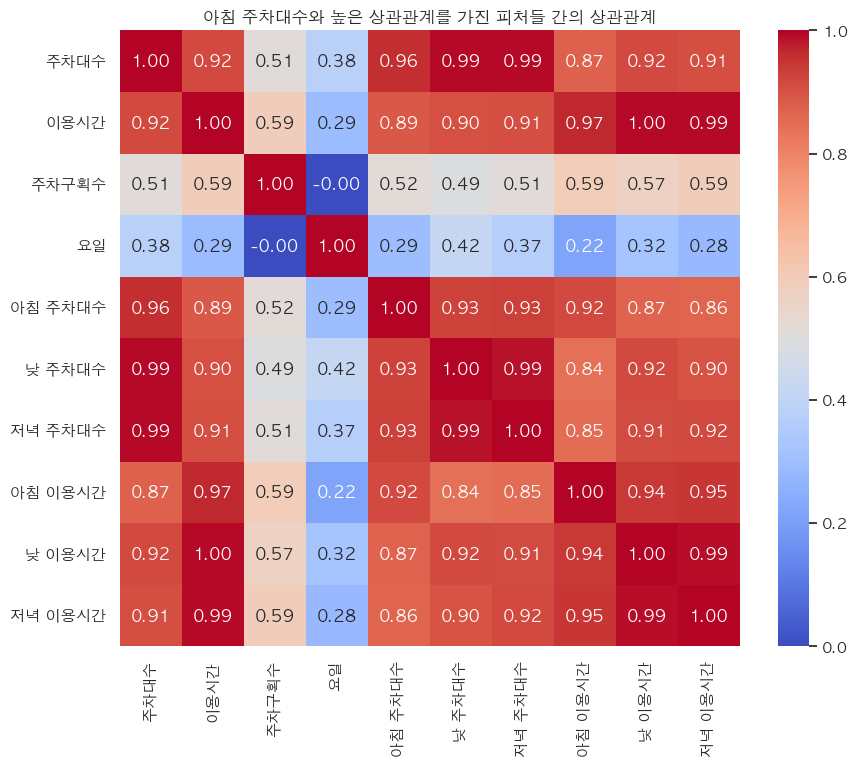

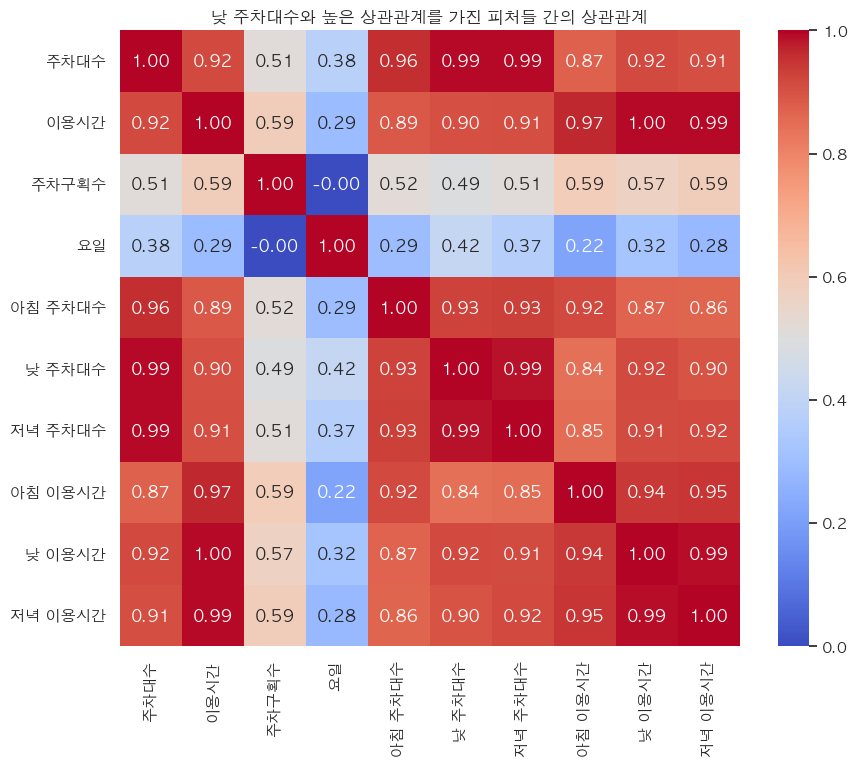

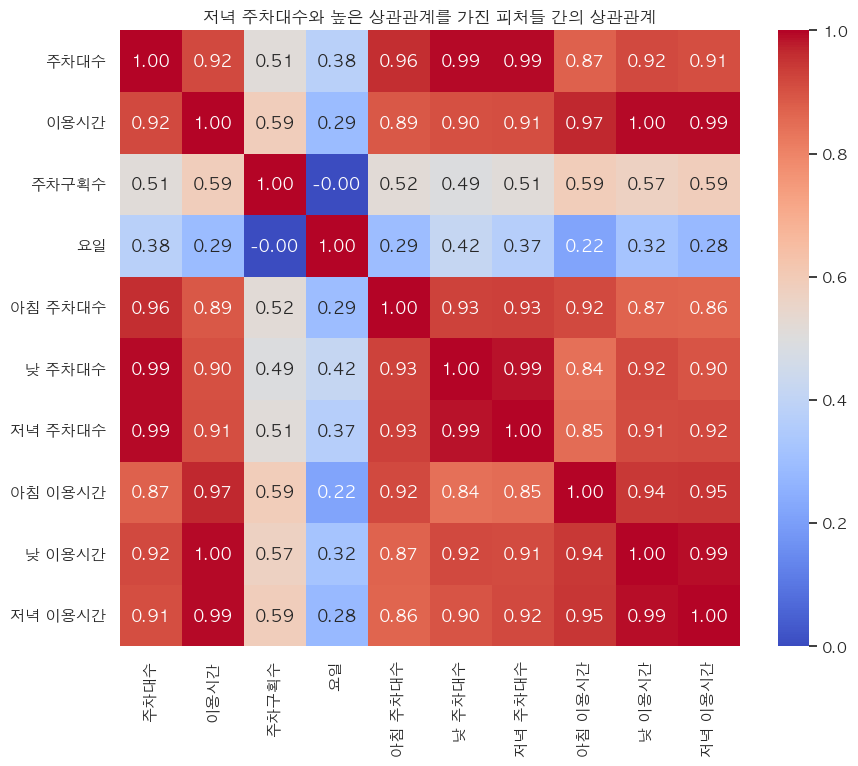

In [147]:
# 숫자형 데이터만 선택
numeric_df = df.select_dtypes(include=['number'])

# 타겟 변수
targets = ['아침 주차대수', '낮 주차대수', '저녁 주차대수']

# 상관관계 계산 및 시각화
for target in targets:
    # 타겟 변수와의 상관관계 계산
    target_corr = numeric_df.corr()[target]

    # 절대값이 0.1 이상인 피처들만 선택
    high_corr_features = target_corr[abs(target_corr) >= 0.1].index
    
    # 상관관계 히트맵 그리기
    plt.figure(figsize=(10, 8))
    sns.heatmap(numeric_df[high_corr_features].corr(), annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
    plt.title(f'{target}와 높은 상관관계를 가진 피처들 간의 상관관계')
    plt.show()

### 시간대별 이용시간의 분포

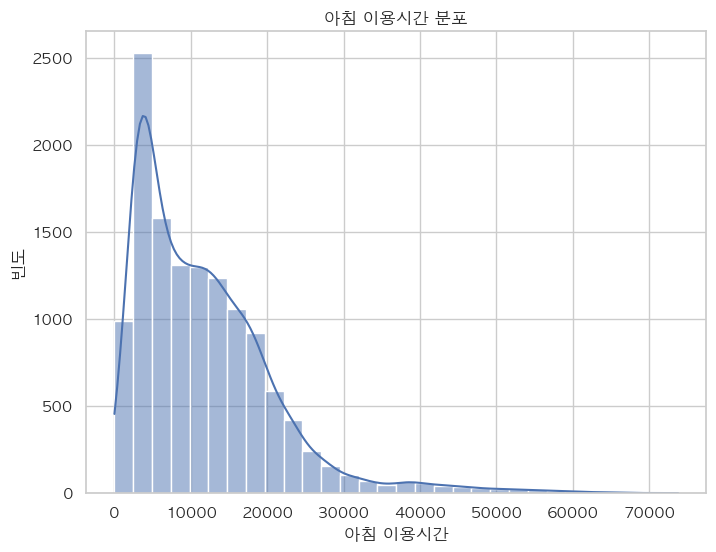

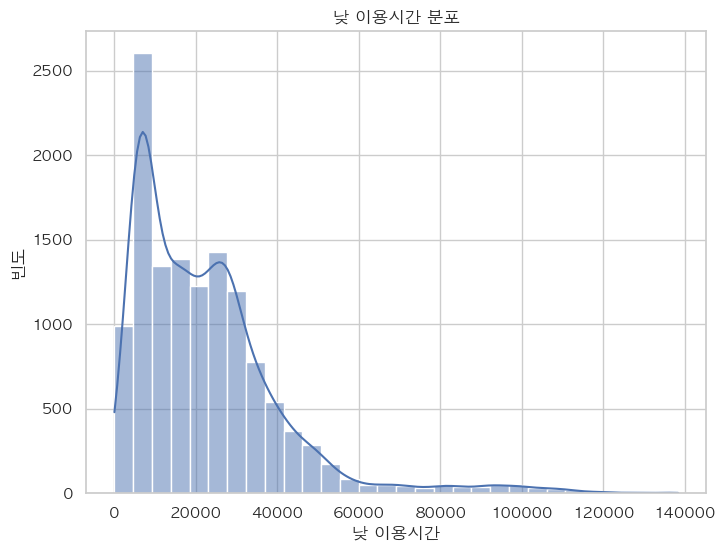

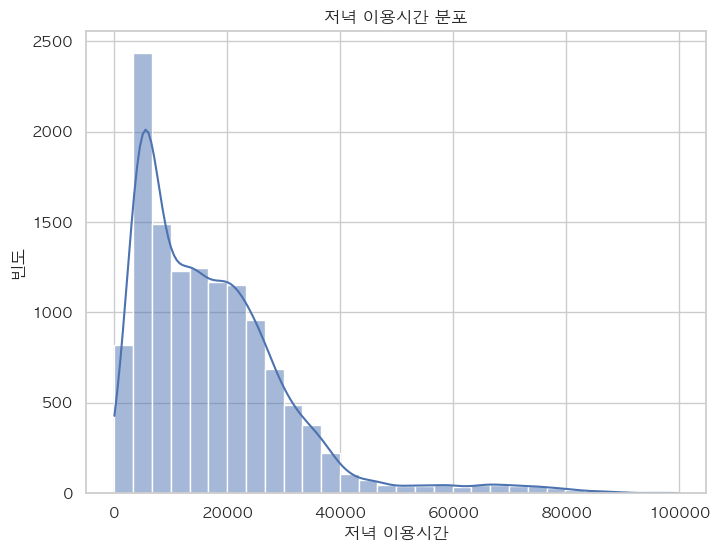

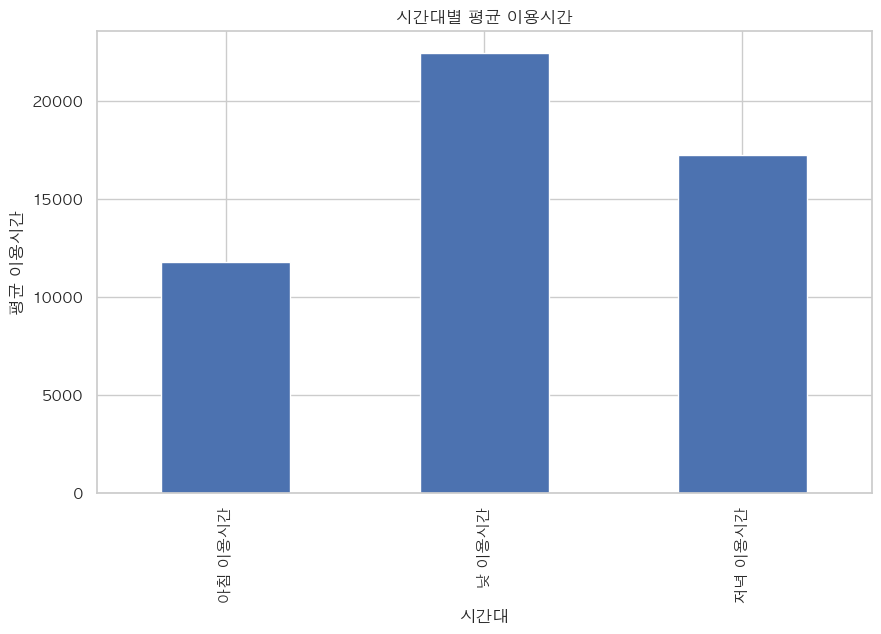

In [148]:
import matplotlib.pyplot as plt
import seaborn as sns

# 시간대별 이용시간 평균
time_usage_means = df[['아침 이용시간', '낮 이용시간', '저녁 이용시간']].mean()

# 히스토그램: 시간대별 이용시간 분포
for col in ['아침 이용시간', '낮 이용시간', '저녁 이용시간']:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'{col} 분포')
    plt.xlabel(col)
    plt.ylabel('빈도')
    plt.show()

# 시간대별 평균 이용시간 시각화
plt.figure(figsize=(10, 6))
time_usage_means.plot(kind='bar')
plt.title('시간대별 평균 이용시간')
plt.xlabel('시간대')
plt.ylabel('평균 이용시간')
plt.show()


시간대별 이용시간 분포
- 아침보다 낮 이용시간이 평균적으로 더 길며, 이는 하루 중 낮 시간대의 주차장이 가장 많이 사용된다는 것으로 확인됨                           
**결론: 낮 시간대가 가장 주차장을 많이 이요하는 것으로 보임

### 요일별 이용시간 분석

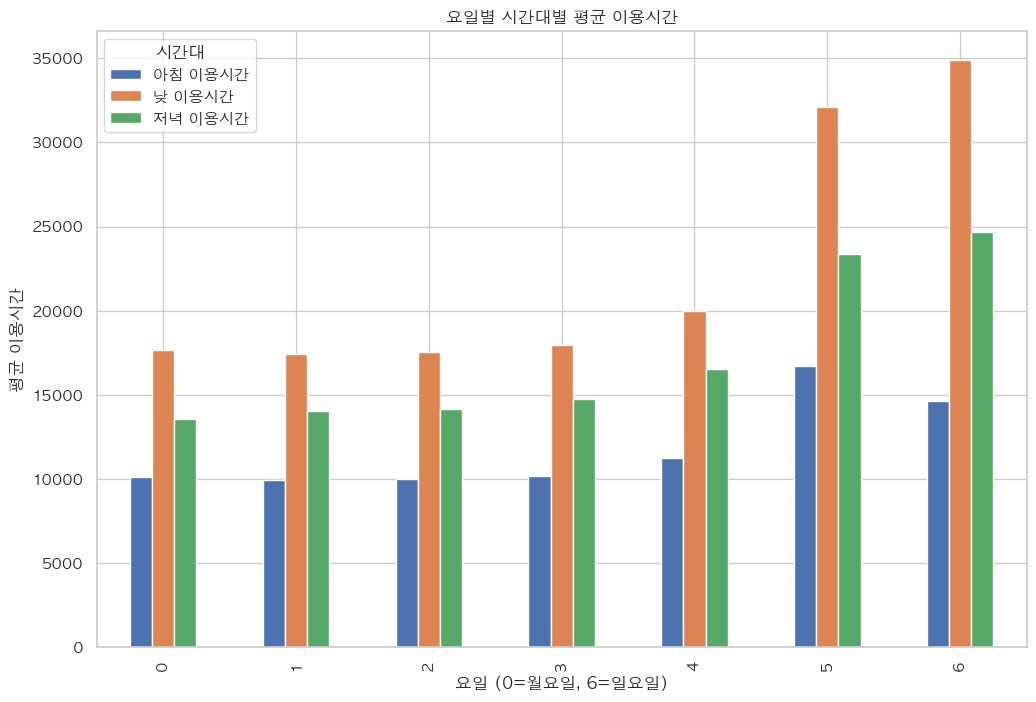

In [149]:
# 요일별 시간대별 평균 이용시간 계산
weekday_usage = df.groupby('요일')[['아침 이용시간', '낮 이용시간', '저녁 이용시간']].mean()

# 요일별 시간대별 평균 이용시간 시각화
weekday_usage.plot(kind='bar', figsize=(12, 8))
plt.title('요일별 시간대별 평균 이용시간')
plt.xlabel('요일 (0=월요일, 6=일요일)')
plt.ylabel('평균 이용시간')
plt.legend(title='시간대')
plt.show()


시간대별 평균 이용시간
- 주말과 평일 모두 낮시간대 이용이 가장 길며, 낮이 가장 이용시간이 적다.                                  
- 평일보다는 주말을 더 많이 사용한다   

### 휴일 여부에 따른 이용시간 비교

<Figure size 1000x600 with 0 Axes>

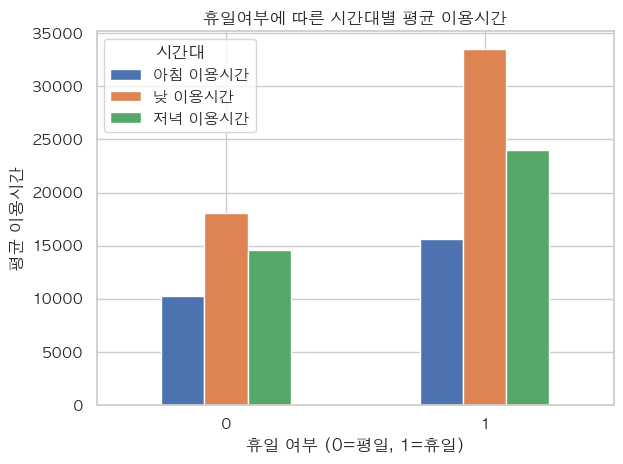

In [150]:
import matplotlib.pyplot as plt
import seaborn as sns

# 휴일여부별 평균 이용시간 계산
avg_usage_by_holiday = df.groupby('휴일여부')[['아침 이용시간', '낮 이용시간', '저녁 이용시간']].mean()

# 막대 그래프 생성
plt.figure(figsize=(10, 6))
avg_usage_by_holiday.plot(kind='bar')
plt.title('휴일여부에 따른 시간대별 평균 이용시간')
plt.xlabel('휴일 여부 (0=평일, 1=휴일)')
plt.ylabel('평균 이용시간')
plt.legend(title='시간대')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

### 주차대수와 이용시간 간 상관관계 분석

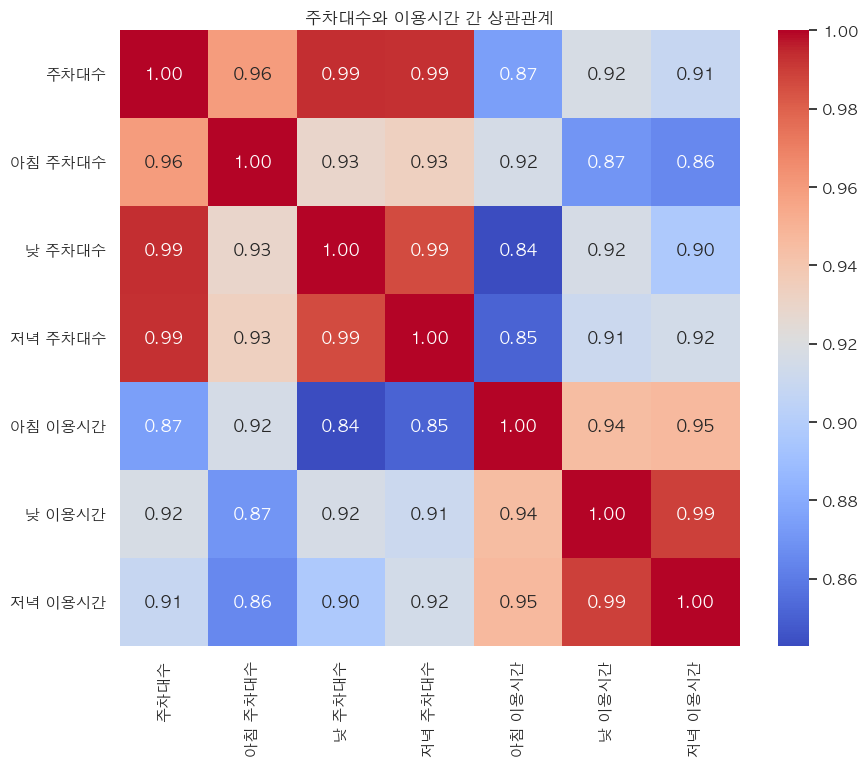

In [151]:
# 상관관계 계산
corr_matrix = df[['주차대수', '아침 주차대수', '낮 주차대수', '저녁 주차대수', '아침 이용시간', '낮 이용시간', '저녁 이용시간']].corr()

# 히트맵으로 시각화
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('주차대수와 이용시간 간 상관관계')
plt.show()


주차대수와 이용시간 간 상관관계
- 전체적으로 주차대수와 이용시간이 높은 관계를 가지는 것으로 보인다.

### 아침 주차대수와 저녁주차대수 비교

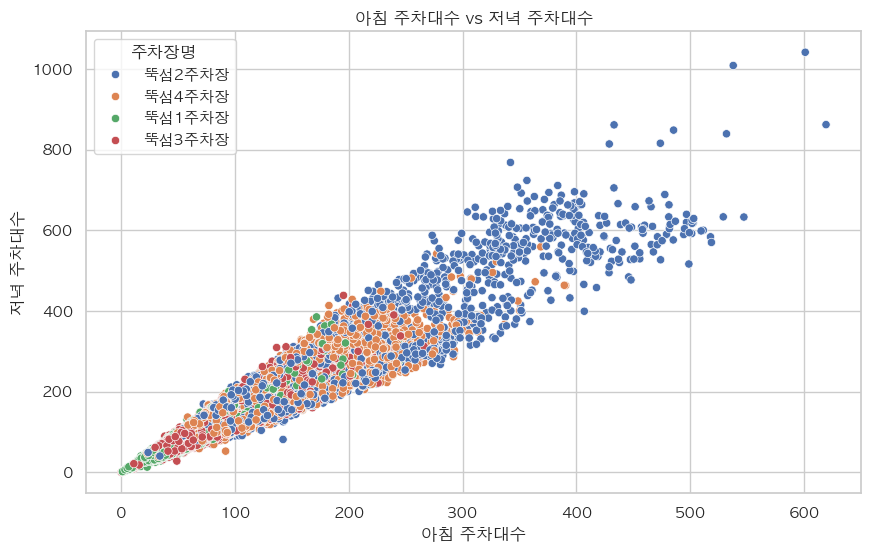

In [152]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='아침 주차대수', y='저녁 주차대수', hue='주차장명')
plt.title('아침 주차대수 vs 저녁 주차대수')
plt.show()

In [175]:
df.to_csv("../Data/뚝섬최종.csv", index=False)

---
# 모델링

## 모델링 목표
    타겟 변수:
    시간대별 주차 대수: 아침 주차대수, 낮 주차대수, 저녁 주차대수.

    입력 피처:
    요일, 휴일여부, 주차장명, 지구별, 연도, 월, 일.

    결과 출력:
    예측된 시간대별 주차 대수 기반으로 혼잡도(여유, 보통, 혼잡, 만차)를 제공

### 혼잡도 계산 기준
    여유: 예측 주차대수 ≤ 50% * 주차구획수
    보통: 50% < 예측 주차대수 ≤ 80% * 주차구획수
    혼잡: 80% < 예측 주차대수 ≤ 100% * 주차구획수
    만차: 예측 주차대수 > 100% * 주차구획수

> 이용시간이 높은 상관관계를 보이나 사용자가 주차 이용시간을 입력하기는 어려움으로 예측 이용시간으로 주차대수를 예측해야 함.

### 데이터 준비

In [153]:
df.columns

Index(['주차장명', '주차대수', '이용시간', '날짜', '주차구획수', '연도', '월', '일', '요일', '휴일여부',
       '도로명', '년도', '아침 주차대수', '낮 주차대수', '저녁 주차대수', '아침 이용시간', '낮 이용시간',
       '저녁 이용시간'],
      dtype='object')

In [154]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12898 entries, 0 to 12897
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   주차장명     12898 non-null  object        
 1   주차대수     12898 non-null  int64         
 2   이용시간     12898 non-null  int64         
 3   날짜       12898 non-null  datetime64[ns]
 4   주차구획수    12898 non-null  int64         
 5   연도       12898 non-null  int32         
 6   월        12898 non-null  int32         
 7   일        12898 non-null  int32         
 8   요일       12898 non-null  int32         
 9   휴일여부     12898 non-null  object        
 10  도로명      12898 non-null  object        
 11  년도       12898 non-null  int64         
 12  아침 주차대수  12898 non-null  float64       
 13  낮 주차대수   12898 non-null  float64       
 14  저녁 주차대수  12898 non-null  float64       
 15  아침 이용시간  12898 non-null  float64       
 16  낮 이용시간   12898 non-null  float64       
 17  저녁 이용시간  12898 non-null  float6

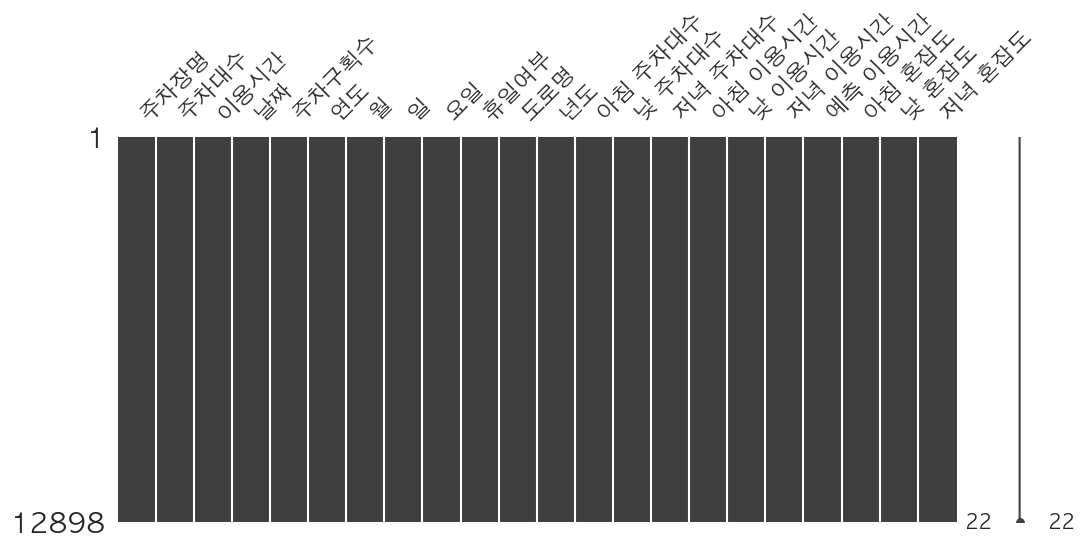

In [168]:
# 결측치 확인
import missingno as msno 

msno.matrix(df, figsize=(12, 5))
plt.show()

In [169]:
# 입력 피처 및 타겟 변수 설정
features = ['요일', '휴일여부', '주차장명', '년도', '월', '일']
target_usage = '이용시간'
targets_parking = ['아침 주차대수', '낮 주차대수', '저녁 주차대수']

# 범주형 데이터 처리
X = pd.get_dummies(df[features])
y_usage = df[target_usage]
y_parking = df[targets_parking]


### 이용시간 예측

In [170]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y_usage, test_size=0.2, random_state=42)

# 모델 학습
usage_model = RandomForestRegressor(random_state=42)
usage_model.fit(X_train, y_train)

# 예측
predicted_usage = usage_model.predict(X_test)

# 훈련 및 테스트 점수 출력
train_score_usage = usage_model.score(X_train, y_train)
test_score_usage = usage_model.score(X_test, y_test)

print(f"이용시간 예측 모델 - 훈련 점수: {train_score_usage:.2f}")
print(f"이용시간 예측 모델 - 테스트 점수: {test_score_usage:.2f}")

이용시간 예측 모델 - 훈련 점수: 0.99
이용시간 예측 모델 - 테스트 점수: 0.94


### 시간대별 주차대수 예측 모델

In [171]:
from sklearn.multioutput import MultiOutputRegressor

# 예측된 이용시간 추가
df['예측 이용시간'] = usage_model.predict(X)

# 새로운 입력 피처 설정
features_with_usage = ['예측 이용시간'] + features
X_parking = pd.get_dummies(df[features_with_usage])

# 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X_parking, y_parking, test_size=0.2, random_state=42)

# MultiOutputRegressor로 학습
parking_model = MultiOutputRegressor(RandomForestRegressor(random_state=42))
parking_model.fit(X_train, y_train)

# 예측
predicted_parking = parking_model.predict(X_test)

# 훈련 및 테스트 점수 출력
train_score_parking = parking_model.score(X_train, y_train)
test_score_parking = parking_model.score(X_test, y_test)

print(f"시간대별 주차대수 예측 모델 - 훈련 점수: {train_score_parking:.2f}")
print(f"시간대별 주차대수 예측 모델 - 테스트 점수: {test_score_parking:.2f}")


시간대별 주차대수 예측 모델 - 훈련 점수: 0.98
시간대별 주차대수 예측 모델 - 테스트 점수: 0.87


### 혼잡도 계산

In [172]:
# 혼잡도 계산 함수
def calculate_congestion(parking_count, capacity):
    ratio = parking_count / capacity
    if ratio <= 0.5:
        return '여유'
    elif ratio <= 0.8:
        return '보통'
    elif ratio <= 1.0:
        return '혼잡'
    else:
        return '만차'

# 예측
predicted_parking_full = parking_model.predict(X_parking)

# 혼잡도 계산
for time, idx in zip(['아침', '낮', '저녁'], range(3)):
    df[f'{time} 혼잡도'] = [
        calculate_congestion(p, c) 
        for p, c in zip(predicted_parking_full[:, idx], df['주차구획수'])
    ]

# 결과 확인
result = df[['날짜', '주차장명', '예측 이용시간', '아침 혼잡도', '낮 혼잡도', '저녁 혼잡도']]
print(result.head())

          날짜    주차장명   예측 이용시간 아침 혼잡도 낮 혼잡도 저녁 혼잡도
0 2024-09-30  뚝섬2주차장  96228.24     보통    만차     혼잡
1 2024-09-30  뚝섬2주차장  96228.24     보통    만차     혼잡
2 2024-09-30  뚝섬4주차장  90407.92     만차    만차     만차
3 2024-09-30  뚝섬4주차장  90407.92     만차    만차     만차
4 2024-09-30  뚝섬1주차장  21039.69     혼잡    만차     만차


In [173]:
X.duplicated().sum()

6449

## 교차검증

In [174]:
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, KFold
import numpy as np

# 예측된 이용시간 추가
df['예측 이용시간'] = usage_model.predict(X)

# 새로운 입력 피처 설정
features_with_usage = ['예측 이용시간'] + features
X_parking = pd.get_dummies(df[features_with_usage])

# MultiOutputRegressor 모델 정의
parking_model = MultiOutputRegressor(RandomForestRegressor(random_state=42))

# K-fold 교차 검증 설정
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# 교차 검증 수행
cv_scores = cross_val_score(parking_model, X_parking, y_parking, cv=kf, scoring='r2')

print("교차 검증 점수:", cv_scores)
print(f"평균 교차 검증 점수: {np.mean(cv_scores):.2f}")
print(f"교차 검증 점수의 표준편차: {np.std(cv_scores):.2f}")

# 전체 데이터로 모델 학습
parking_model.fit(X_parking, y_parking)

# 모델 성능 평가
train_score = parking_model.score(X_parking, y_parking)
print(f"전체 데이터 학습 점수: {train_score:.2f}")

교차 검증 점수: [0.87475249 0.9207743  0.92790287 0.91641075 0.92299488]
평균 교차 검증 점수: 0.91
교차 검증 점수의 표준편차: 0.02
전체 데이터 학습 점수: 0.98
